In [59]:
import numpy as np
import numpy.linalg
import matplotlib.pyplot as plt
import numpy.random

def f(x):
    return np.sin(x/5) * np.exp(x/10) + 5 * np.exp(-1/2 * x)

## Исходная функция:

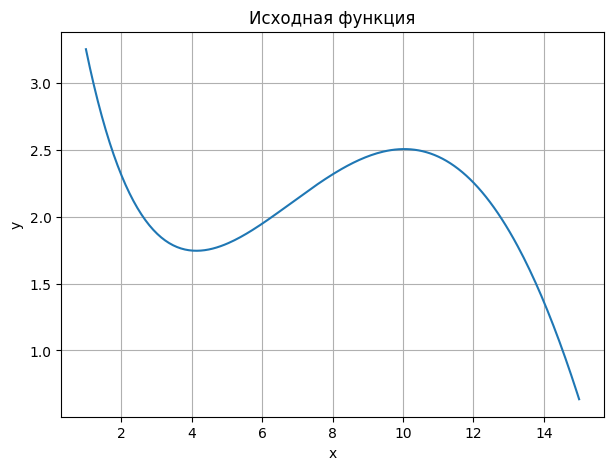

In [60]:
def func(n):
    x = np.linspace(1, 15, n)
    fig, axes = plt.subplots(figsize=(7,5))
    axes.plot(x, f(x))
    axes.set_title('Исходная функция')
    axes.grid()
    axes.set_ylabel('y')
    axes.set_xlabel('x')

func(250)

## 1. Полиномиальная регрессия 

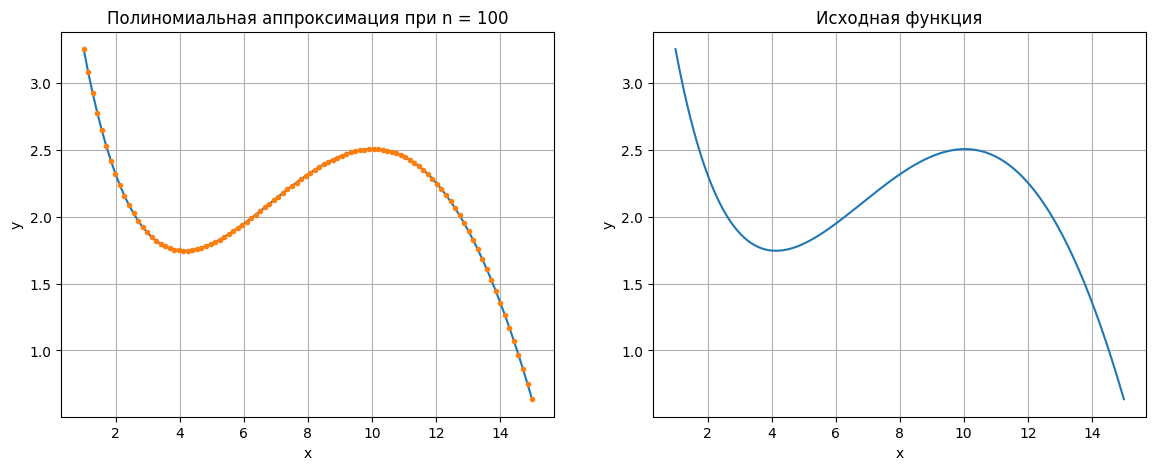

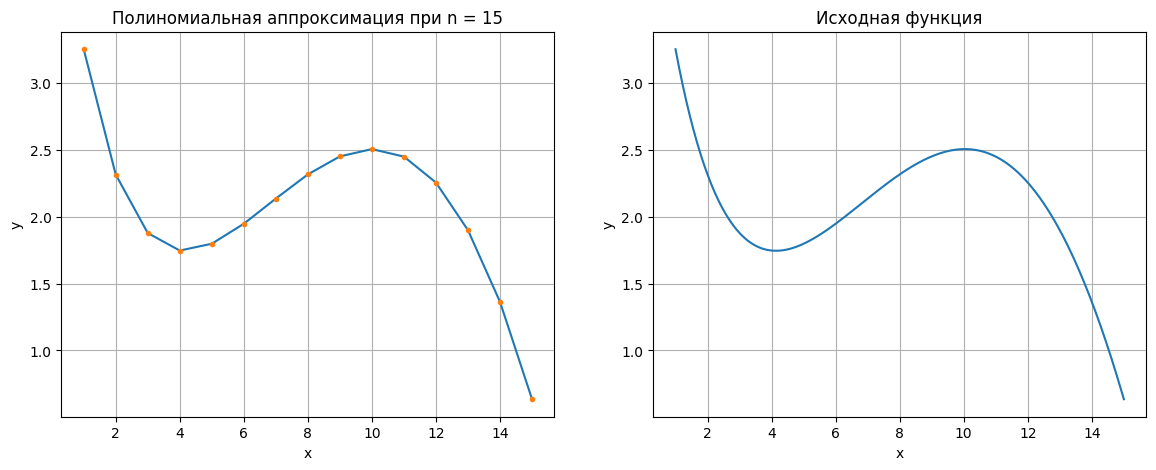

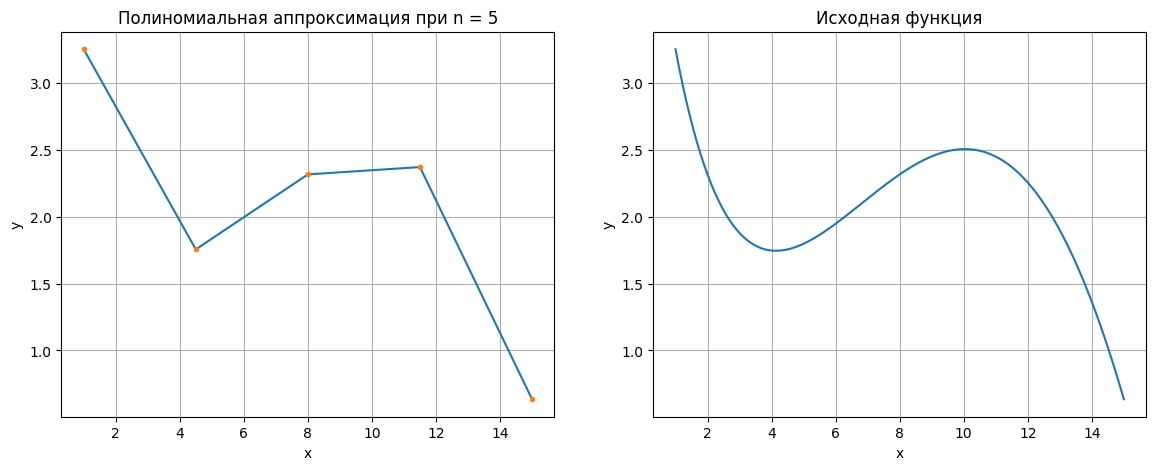

In [61]:
def pol_ap(n):
    x_dots = np.linspace(1, 15, n)
    a = np.array([[x**j for j in range(n)] for x in x_dots])
    b = f(x_dots)
    mat = np.linalg.solve(a, b)
    res = np.array([sum([mat[j] * x**j for j in range(n)]) for x in x_dots])
    return res, b



def pol_ap_func(n):
    x = np.linspace(1, 15, n)
    res = pol_ap(n)
    fig, axes = plt.subplots(1, 2, figsize=(14,5))
    axes[0].plot(np.linspace(1, 15, n), res[0])
    axes[0].plot(np.linspace(1, 15, n), res[1], '.')
    axes[0].set_title(f'Полиномиальная аппроксимация при n = {n}')
    axes[0].grid()
    axes[0].set_ylabel('y')
    axes[0].set_xlabel('x')
    x1 = np.linspace(1, 15, 250)
    axes[1].plot(x1, f(x1))
    axes[1].set_title('Исходная функция')
    axes[1].grid()
    axes[1].set_ylabel('y')
    axes[1].set_xlabel('x')
pol_ap_func(100)
pol_ap_func(15)
pol_ap_func(5)

При увеличении числа n, график становится более гладким и приближается к исходной функции, когда при уменьшении этого числа функция становится ломанной и менее похожей на исходную.

## 2. Полиномиальная регрессия с зашумлённым данными 

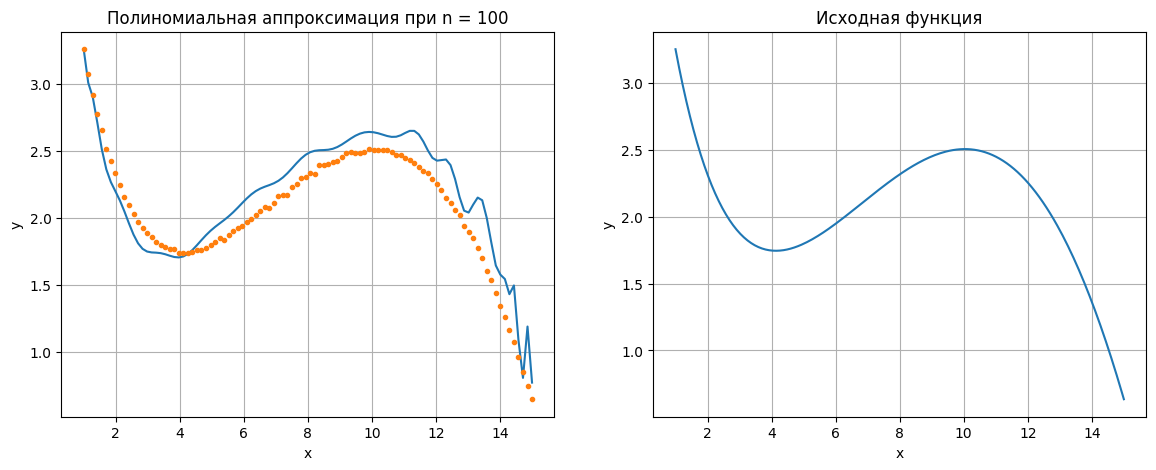

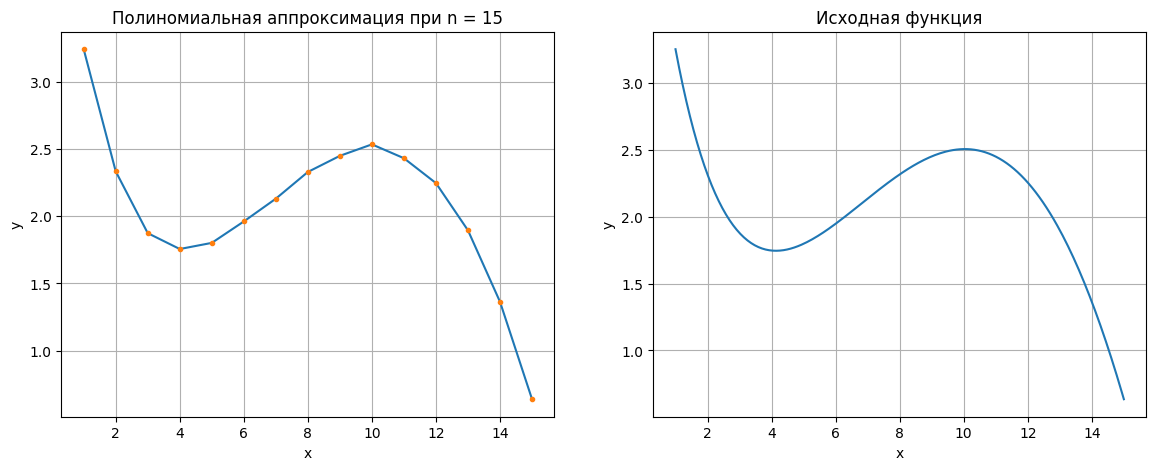

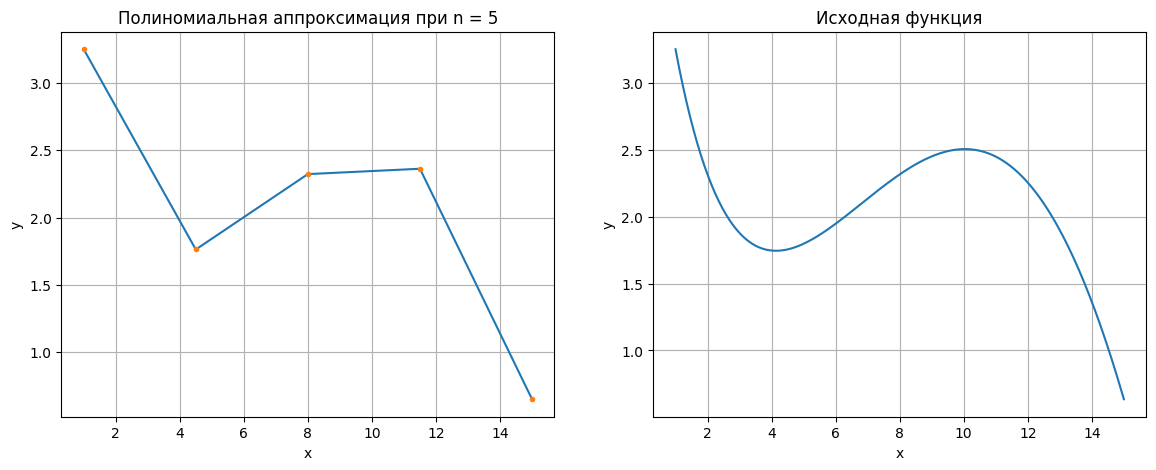

In [62]:
def pol_ap(n):
    x_dots = np.linspace(1, 15, n)
    a = np.array([[x**j for j in range(n)] for x in x_dots])
    b = f(x_dots)
    for i in range(len(b)):
        b[i] += np.random.normal(0, 0.01)
    mat = np.linalg.solve(a, b)
    res = np.array([sum([mat[j] * x**j for j in range(n)]) for x in x_dots])
    return res, b

pol_ap_func(100)
pol_ap_func(15)
pol_ap_func(5)

При добавлении шума точность уменьшается, однако с малым n результат остается похожим на результат без шума.

## 3. Метод наименьших квадратов 

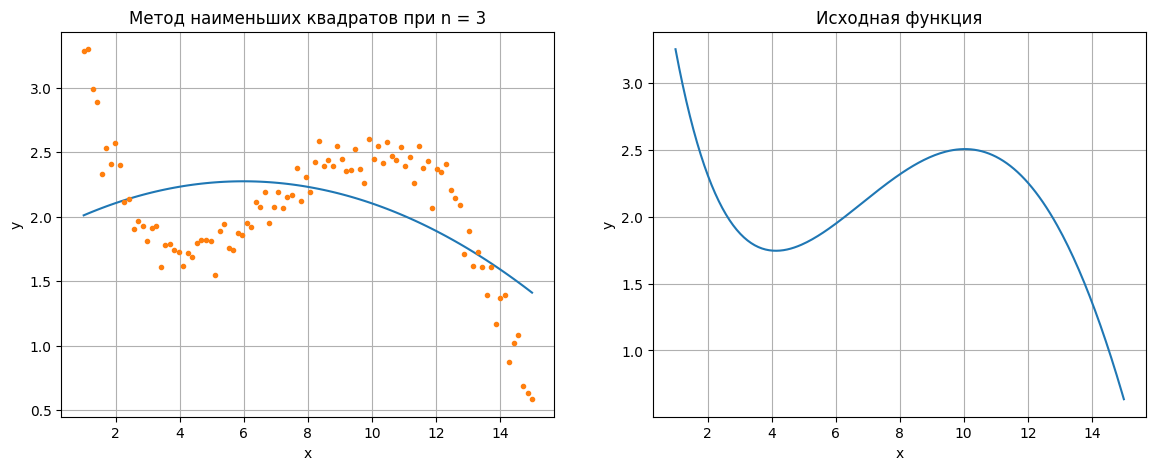

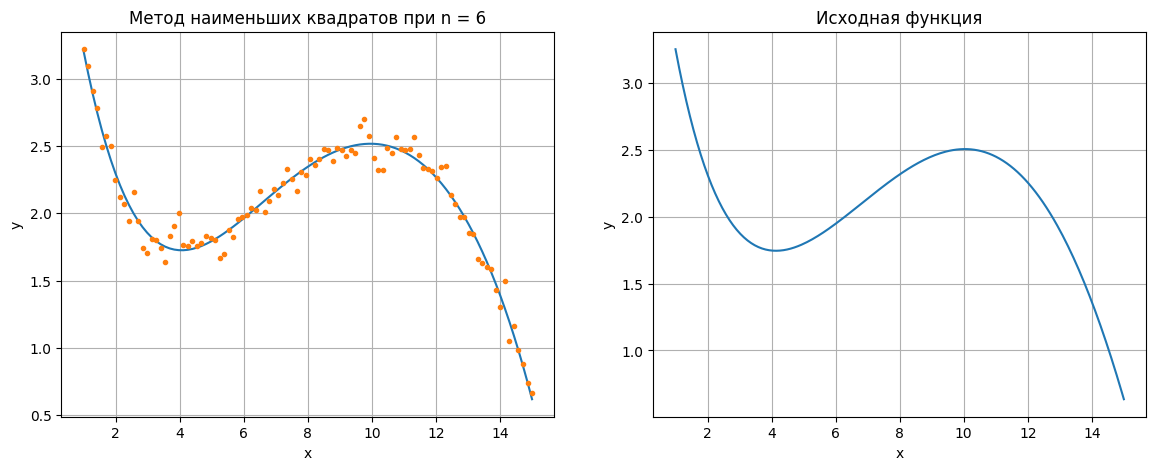

In [63]:
N = 100
def squares(N, n):
    x_dots = np.linspace(1, 15, N)

    a = np.array([[x**j for j in range(n)] for x in x_dots])
    b = f(x_dots)
    for i in range(len(b)):
        b[i] += np.random.normal(0, 0.1)

    w, resid, rank, s = numpy.linalg.lstsq(a, b, rcond=None)
    res = np.array([sum([w[j] * x**j for j in range(n)]) for x in x_dots])
    
    return res, b


def sq_pol_ap_func(n):
    x = np.linspace(1, 15, n)
    res = squares(N, n)
    fig, axes = plt.subplots(1, 2, figsize=(14,5))
    axes[0].plot(np.linspace(1, 15, N), res[0])
    axes[0].plot(np.linspace(1, 15, N), res[1], '.')
    axes[0].set_title(f'Метод наименьших квадратов при n = {n}')
    axes[0].grid()
    axes[0].set_ylabel('y')
    axes[0].set_xlabel('x')
    x1 = np.linspace(1, 15, 250)
    axes[1].plot(x1, f(x1))
    axes[1].set_title('Исходная функция')
    axes[1].grid()
    axes[1].set_ylabel('y')
    axes[1].set_xlabel('x')

sq_pol_ap_func(3)
sq_pol_ap_func(6)

При n=3 график совсем не точный, при n=6 график смог приблизиться к исходному. 

### Выводы:
Исходя из построенных графиков, можно сделать вывод, что при достаточно большом n можно хорошо приблизиться к исходному графику даже с помехами. 